In [4]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File to Load
file_path = "Resources/sugar_per_person_g_per_day-FAO.csv"

# Read Purchasing File and store into Pandas data frame
sugar_intake = pd.read_csv(file_path)

#sugar_intake.head()

In [6]:
#create table with last 3 years
sugar_intake_2011 = sugar_intake[['Country','2011']]
sugar_intake_2012 = sugar_intake[['Country','2012']]
sugar_intake_2013 = sugar_intake[['Country','2013']]
                            

In [7]:
#get top 3 countires for each year
top_2011 = sugar_intake_2011.nlargest(3, ['2011']) 
top_2012 = sugar_intake_2012.nlargest(3, ['2012']) 
top_2013 = sugar_intake_2013.nlargest(3, ['2013']) 

In [9]:
#combine top 3 into one dataframe to create visulaiztions
top_combine = pd.merge(top_2011, top_2012, how='outer', on='Country')
top_combine = pd.merge(top_combine, top_2013, how='outer', on='Country')


top_combine

,Country,2011,2012,2013
0,United States,172.0,174.0,175.0
1,Malta,165.0,168.0,168.0
2,Switzerland,160.0,165.0,166.0


Text(0, 0.5, 'Average grams per day')

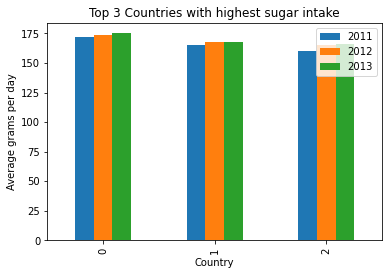

In [10]:
top_combine.plot(kind='bar')

# Give the chart a title, x label, and y label
plt.title("Top 3 Countries with highest sugar intake")
plt.xlabel("Country")
plt.ylabel("Average grams per day")

In [12]:
#10 years of sugar intake 
sugar_overtime = sugar_intake[['Country','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']]
sugar_overtime.set_index('Country',inplace=True)
#sugar_overtime.head()

In [13]:
#find mean for each year globally 
mean_04 = sugar_overtime.mean()['2004']
mean_05 = sugar_overtime.mean()['2005']
mean_06 = sugar_overtime.mean()['2006']
mean_07 = sugar_overtime.mean()['2007']
mean_08 = sugar_overtime.mean()['2008']
mean_09 = sugar_overtime.mean()['2009']
mean_10 = sugar_overtime.mean()['2010']
mean_11 = sugar_overtime.mean()['2011']
mean_12 = sugar_overtime.mean()['2012']
mean_13 = sugar_overtime.mean()['2013']

#create df for line plot
global_mean_sugar_intake = pd.DataFrame({
    '2004':mean_04,
    '2005':mean_05,
    '2006':mean_06,
    '2007':mean_07,
    '2008':mean_08,
    '2009':mean_09,
    '2010':mean_10,
    '2011':mean_11,
    '2012':mean_12,
    '2013':mean_13},index=['Global Average'])

global_mean_sugar_intake

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Global Average,81.0675,80.81506,82.843571,83.695476,84.071964,83.516071,83.254762,83.62381,84.061905,84.483333


In [14]:
#trasnpose data for line graph
transposed = global_mean_sugar_intake.T
transposed

,Global Average
2004,81.067500
2005,80.815060
2006,82.843571
2007,83.695476
2008,84.071964
2009,83.516071
2010,83.254762
2011,83.623810
2012,84.061905
2013,84.483333


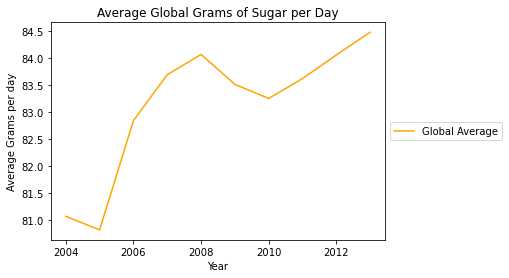

In [15]:
#plot global average
transposed.plot(color='orange')
plt.title('Average Global Grams of Sugar per Day')
plt.ylabel('Average Grams per day')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [16]:
#top 3 countires + canada of sugar intake over time 
sugar_overtime_four = sugar_overtime.iloc[[159,95,145,26]]
sugar_overtime_four
plt.savefig("Top 3 Countries - Highest Sugar Intake")

<Figure size 432x288 with 0 Axes>

In [17]:
#transpose the data for line graph
transposed_countries= sugar_overtime_four.T
transposed_countries

Country,United States,Malta,Switzerland,Canada
2004,194.0,150.0,163.0,149.0
2005,193.0,149.0,161.0,147.0
2006,187.0,137.0,164.0,145.0
2007,175.0,137.0,162.0,146.0
2008,170.0,162.0,163.0,141.0
2009,165.0,174.0,159.0,136.0
2010,167.0,171.0,161.0,126.0
2011,172.0,165.0,160.0,137.0
2012,174.0,168.0,165.0,132.0
2013,175.0,168.0,166.0,132.0


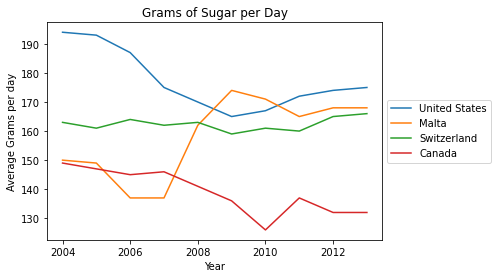

In [18]:
#plot average sugar per day for top 3 counties + Canada beacsue we are Canadian
transposed_countries.plot()
plt.title('Grams of Sugar per Day')
plt.ylabel('Average Grams per day')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average Global Grames of Sugar per Day", bbox_inches='tight')

In [19]:
#Global Avegare merged with top countries 
global_vs_countries = pd.merge(transposed_countries, transposed,left_index=True, right_index=True)
global_vs_countries 

,United States,Malta,Switzerland,Canada,Global Average
2004,194.0,150.0,163.0,149.0,81.067500
2005,193.0,149.0,161.0,147.0,80.815060
2006,187.0,137.0,164.0,145.0,82.843571
2007,175.0,137.0,162.0,146.0,83.695476
2008,170.0,162.0,163.0,141.0,84.071964
2009,165.0,174.0,159.0,136.0,83.516071
2010,167.0,171.0,161.0,126.0,83.254762
2011,172.0,165.0,160.0,137.0,83.623810
2012,174.0,168.0,165.0,132.0,84.061905
2013,175.0,168.0,166.0,132.0,84.483333


In [20]:
#create data frame to plot global average vs top county + Canada beacuse we are Canada 
global_vs_US_CAD = global_vs_countries[['Global Average','United States','Canada']]
global_vs_US_CAD

,Global Average,United States,Canada
2004,81.067500,194.0,149.0
2005,80.815060,193.0,147.0
2006,82.843571,187.0,145.0
2007,83.695476,175.0,146.0
2008,84.071964,170.0,141.0
2009,83.516071,165.0,136.0
2010,83.254762,167.0,126.0
2011,83.623810,172.0,137.0
2012,84.061905,174.0,132.0
2013,84.483333,175.0,132.0


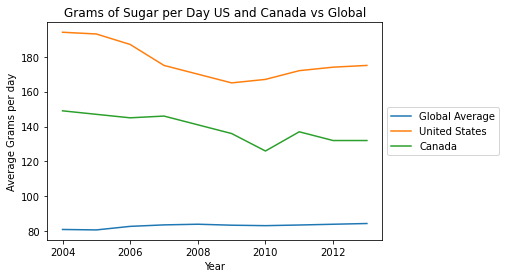

In [21]:
#plot global average vs top county + Canada beacuse we are Canada 
global_vs_US_CAD.plot()
plt.title('Grams of Sugar per Day US and Canada vs Global')
plt.ylabel('Average Grams per day')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average Global Grames of Sugar per Day", bbox_inches='tight')

In [22]:
#canada's ranking for 2011,2012,2013
canada_2011 = sugar_intake_2011.iloc[[26]].sort_values(by="2011",ascending=False)
canada_2012 = sugar_intake_2012.iloc[[26]].sort_values(by="2012",ascending=False)
canada_2013 = sugar_intake_2013.iloc[[26]].sort_values(by="2013",ascending=False)

#print(canada_2011) - 26th
#print(canada_2012) - 26th
#print(canada_2013) - 26th